# TPC2 - Cadeias de Markov e algoritmo de Metropolis

• Não deve escrever o seu nome nem nenhum código identificador em nenhum sítio.

• Deve entregar ESTE Notebook de Jupyter.

• O trabalho é individual. Podem e devem haver discussões com colegas mas o resultado entregue é individual.

• Não deve acrescentar ou apagar nenhuma célula.

• Todas as explicações devem ser claras e concisas.

• É preferível fazer menos e fazer bem que muito e mal.

• O pacote numba pode diminuir o tempo de cálculo.

• A não verificação de alguma destas regras leva ao anulamento e exclusão da prova.

In [ ]:
import numpy as np
from matplotlib.pylab import*
%matplotlib inline
import scipy as sp
import scipy.linalg as linalg
set_printoptions(precision=3, linewidth=200, suppress=True)

# Problema 1 - Matrizes de Markov

Considere um sistema que pode estar num de três estados possíveis: A, B ou C. Estando num determinado estado no instante $t$, tem uma probabilidade de transitar para um outro estado no instante seguinte $t\!+\!\Delta t$. Um exemplo disto é a meteorologia. Se num determinado dia estiver sol, existe uma determinada probabilidade de no dia seguinte estar nublado, ou de chover, ou de continuar a estar sol. Assumindo que o processo é Markoviano, estudemos a dinâmica estocástica do sistema a tempo discreto. <br>

1. Considere que no instante inicial $t=0$, o sistema tem uma probabilidade $p_{i}(0)$ de estar no estado $i$ (onde $i\!=\!A,\!B,\!C$). Estas probabilidades podem ser organizadas no vector linha $$\mathbf{p}\!\left(0\right)=\left[p_{\!\scriptscriptstyle{A}}\!\left(0\right)\!,p_{\scriptscriptstyle{B}}\!\left(0\right)\!,p_{\scriptscriptstyle{C}}\!\left(0\right)\right]$$ de tal forma que a soma dos seus elementos seja 1 (normalização da distribuição de probabilidades de um dado evento no instante inicial).

Considere ainda as seguintes probabilidades de transição num dado passo temporal $t\!\to\! t\!+\!\Delta t$:
- Partindo do estado A temos $p(B,t\!+\!\Delta t|A,t)\!=\!\frac{1}{2}$ e $p(C,t\!+\!\Delta t|A,t)\!=\!\frac{1}{2}$;
- Partindo do estado B temos $p(A,t\!+\!\Delta t|B,t)\!=\!\frac{1}{3}$ e $p(C,t\!+\!\Delta t|B,t)\!=\!\frac{2}{3}$;
- Partindo do estado C temos $p(A,t\!+\!\Delta t|C,t)\!=\!\frac{1}{4}$ e $p(B,t\!+\!\Delta t|C,t)\!=\!\frac{1}{4}$;

Qual é a probabilidade de encontrar o sistema no estado $j$ no primeiro instante da evolução temporal, i.e. $t=\Delta t$? Exprima a resposta na forma de uma equação matricial, $$\mathbf{p}(\Delta t)\!=\!\mathbf{p}(0)\!\cdot\! \mathbb{M},$$
determinando a matriz $\mathbb{M}$. Essa matriz é uma matriz de Markov? Justifique.

A matriz $\mathbb{M}$ pode ser escrita como:

$$ \mathbb{M}= \left(\begin{array}{ccc}
p(A,t+\Delta t|A,t) & p(B,t+\Delta t|A,t)&p(C,t+\Delta t|A,t) \\
p(A,t+\Delta t|B,t)& p(B,t+\Delta t|B,t)& p(C,t+\Delta t|B,t)\\
p(A,t+\Delta t|C,t)&p(B,t+\Delta t|C,t) &p(C,t+\Delta t|C,t) \end{array}\right)
= \left(\begin{array}{ccc}
0& 1/2&1/2 \\
1/3 &0 &2/3 \\
1/4 &1/4 &1/2 \end{array}\right) $$

Cada elemento de uma coluna corresponde à probabilidade de, estando no estado correspondente à linha, transitar para uma outro ou ficar no mesmo (De notar que esta proprieadade referente às linhas deve-se ao facto de esta convensão usar o produto ). Posto, isto, foi possível construir a matriz anterior tendo em conta as probabilidades de transição dadas no enunciado e o facto de a soma dos elementos de cada linha ter que ser 1, o que a torna uma matriz de Markov pois satisfaz as condições:

$$ \begin{cases}\sum_{j} \mathbb{M}_{ij}=1&\forall i\\ \mathbb{M}_{ij}\geq 0 &\forall i,j \end{cases} $$

Assim, a matriz $P(\Delta t)$ é obtida pela equação:

$$ P(\Delta t) = \left(\begin{array}{c}p_A(0)\\p_B(0) \\p_C(0) \end{array}\right)\cdot \left(\begin{array}{ccc}
0& 1/2&1/2 \\
1/3 &0 &2/3 \\
1/4 &1/4 &1/2 \end{array}\right) $$

In [ ]:
p0 = array([1/3,1/3,1/3],dtype = float) # se tiverem todos igual probabilidade de estar no primeiro estado
M = array([[0,1/2,1/2],
            [1/3,0,2/3],
            [1/4,1/4,1/2]],dtype = float)
p_Delta_t = dot(p0,M)
print(p_Delta_t)


[0.194 0.25  0.556]


2. Se o sistema começar no estado A em $t=0$, qual é a probabilidade de vir a estar no estado $i$ em $t=n\Delta t$? Represente estas probabilidades num só gráfico para $n=[0,1,2,4,8,16]$ e $i\!=\!A,B,C$. Observe se a probabilidade final de cada um dos estados do sistema muda, se este começar em B ou C e comente à luz das propriedades que conhece de um processo de Markov. Verifique que a probabilidade permanece normalizada em virtude das propriedades da matriz de Markov.

Uma vez que começamos no estado $A$ em $t=0$,o nosso vetor $\mathbf{p}(0)$

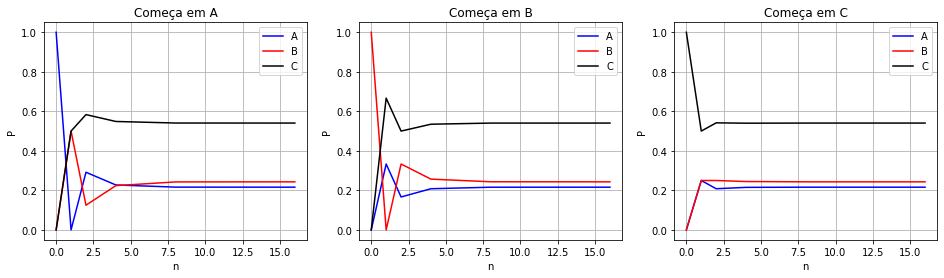

In [ ]:
p0s = array([[1,0,0],  # começa em A
             [0,1,0],  # começa em B
             [0,0,1]]) # começa em C
Estado = ['A','B','C']
colors = ['b','r','k']
ns = array([0,1,2,4,8,16])

figure(figsize=(16,4))

for p0 in range(len(p0s)):
    nplot = zeros([len(ns),3])
    for n in range(len(ns)):
        nplot[n] = p0s[p0] @ matrix_power(M,ns[n])

    subplot(1,3,p0+1)
    for i in range(len(p0s)):
        plot(ns,nplot[:,i],label=Estado[i],c=colors[i])
    title('Começa em '+ Estado[p0])
    xlabel('n')
    ylabel('P')
    legend()
    grid()

3. Repita a análise anterior, mas partindo de um estado misto do sistema $-$ $\mathbf{p}(0)\!=\![0.3,0.6,0.1]$.

#Responda Aqui

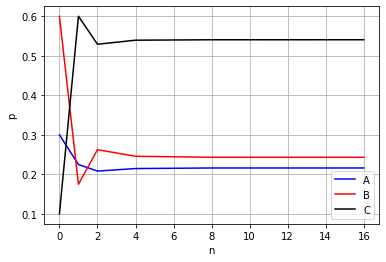

In [ ]:
p03 = array([0.3,0.6,0.1])
data = zeros([len(ns),3])
for n in range(len(ns)):
        data[n] = p03 @ matrix_power(M,ns[n])

for i in range(len(p03)):
    plot(ns,data[:,i],c=colors[i],label=Estado[i])
grid()
legend()
xlabel('n')
ylabel('p');

4. Calcule os valores próprios desta matriz $\mathbb{M}$ e os vectores próprios à esquerda e à direita, numericamente. Prove que os vectores próprios da matriz $\mathbb{M}$ associados a valores próprios distintos são ortogonais entre si (no sentido apropriado) e verifique isto numericamente. Qual o significado dos vectores próprios com valor próprio 1?

Queremos provar que o produto interno entre um vetor próprio à esquerda (associado a um dado valor próprio) por um vetor próprio à direita (associado a um valor próprio diferente do anterior) é nulo. Sendo $l_i^\beta$ um vetor próprio à esquerda associado a um valor próprio $\beta$ e $r_i^\alpha$ um vetor próprio à direita associado a um valor próprio $\alpha$:

$$ l_i^\beta r_i^\alpha=0 \qquad i \neq j$$

Relativamente ao significado de vetores próprios com valor próprio 1, podemos dizer que estão associados ao ponto em que é atingido o regime assimptótico uma vez que este corresponde à distribuição de probabilidade que é o estado próprio da matriz de Markov com valor prórprio $\lambda =1$

In [ ]:
Val,VecL,VecR = linalg.eig(M,left=True,right=True)
print('Valores Próprios: \n',real(Val))
print('\n Vetores Próprios à esquerda: \n',VecL)
print(' \n Vetores Próprios à direita: \n', VecR,'\n')

for i in range(3):
    for j in range(3):
        if i != j:
            print(VecL[:,i] @ VecR[:,j])
print('\n Como se pode ver os vetores são, de facto, ortogonais')

Valores Próprios: 
 [ 1.    -0.394 -0.106]

 Vetores Próprios à esquerda: 
 [[ 0.577  0.815 -0.838]
 [ 0.577 -0.576 -0.287]
 [ 0.577 -0.067  0.464]]
 
 Vetores Próprios à direita: 
 [[ 0.343  0.47  -0.295]
 [ 0.386 -0.813 -0.512]
 [ 0.857  0.344  0.807]] 

4.440892098500626e-16
3.885780586188048e-16
3.122502256758253e-16
-1.8735013540549517e-16
1.1102230246251565e-16
8.326672684688674e-17

 Como se pode ver os vetores são, de facto, ortogonais


5. Os outros valores próprios também têm um significado importante para a dinâmica estocástica do sistema. Considere $\mathbb{N}$ uma matriz de Markov diagonalizável sendo $v_i$ o seu único vector próprio à esquerda de valor próprio $\lambda_i$. Descreva $\mathbf{p}(0)$ como uma combinação dos $v_i$ e use isso para encontrar uma expressão analítica para $p(n\Delta t)$. Ordenando os valores próprios pela magnitude do seu módulo (assumindo que são todos distintos): $\lambda_1 > \lambda_2 > \lambda_3 > ... $, escreva a lei de decaimento assimptótico para a distribuição de equilíbrio quando $t\rightarrow \infty$

Uma matriz de Markov pode ser escrita em termos dos seus vetores próprios à direita da seguinte forma:

$$ v_{i}^{(\beta)} \mathbb{N}_{i j}=\lambda_{\beta} v_{j}^{(\beta)} $$

Sendo que os vetores próprios são todos distintos, o seu conjunto forma uma base completa para o espaço dos eventos. Então, podemos escrever qualquer condição inicial $P_i(0)$ como uma combinação linear dos vetores próprios à esquerda:

$$ P_i(0)=\sum_\alpha v_i^{(\alpha)} a_\alpha  $$

em que os coeficientes $a_\alpha$ são obtidos através do produto interno com o vetor próprio à esquerda:

$$ P_i(0)r_i^{(\beta)}=a_\beta $$

em que se usou $v_i^\beta r_i^\alpha = \delta_{\alpha\beta}$.

A matriz de Markov pode ser escrita a partir dos valores próprios e dos vetores próprios à direita e esquerda. A relação de ortogonalidadade pode ser escrita como:

$$ L_{\beta i}R_{i\alpha}=\delta_{\alpha \beta} $$

onte $L$ é a matriz com os vetores prórpios à esquerda em cada linha e $R$ é a matriz com os vetores próprios em cada coluna. Sendo que esta igualdade implica: $L=R^{-1}$ e $R=L{-1}$. E assim:

$$ L_{\alpha i} \mathbb{N}_{i j} R_{j \beta}=\lambda_{\beta} \delta_{\alpha \beta} \\ \mathbb{N}_{i j}=R_{i \alpha} \lambda_{\beta} \delta_{\alpha \beta} L_{\beta j} $$

o que permite escrever a distribuição de probababilidade num qualquer tempo como:

$$ P_{i}(t)=\sum_{\alpha} v_{i}^{(\alpha)}a_{\alpha} \lambda_{\alpha}^{t}  $$

Em que se verifica que, para um tempo assimptótico, a contribuição de todos os valores próprios com módulo inferior à unidade tende a anular-se. E atendento ao facto que os valores próprio são valores reais, o comportamento assimptótico no tempo é dado por:

$$ \lim_{t \to +\infty} P_{i}(t)=\lim_{t \to +\infty}\left(\sum_{\alpha} v_{i}^{(\alpha)}a_{\alpha} \lambda_{\alpha}^{t}\right) $$

tendo em conta que os valores próprios estão ordenados por ordem decrescente ($\lambda_{1}=1$):

$$ \lim_{t \to +\infty}\left(v_{i}^{(\alpha_1)}a_{\alpha_1}+ \sum_{\alpha\neq \alpha_1}v_{i}^{(\alpha)}a_{\alpha}e^{-t\ln\frac{1}{\lambda_\alpha}}\right) = v_{i}^{(\alpha_1)}a_{\alpha_1} $$

o que também pode ser escrito como:

$$ \lim _{t \rightarrow+\infty} P_{i}(t)=\sum_{\beta \in A} v_{i}^{(\beta)} a_{\beta} $$

em que $A$ é o conjunto dos índices com valor próprio cujo módulo é a unidade.-

6. Vamos agora abordar o problema de um modo diferente mas equivalente. Considere que no instante $t=n\Delta t$ o sistema está no estado $I$. Então, será lançado um número aleatório para decidir em que estado o sistema estará no instante seguinte $t=(n+1)\Delta t$. Por exemplo, nas condições do exercício, se o sistema estiver no estado $A$, terá uma probabilidade $0.5$ de ir para $B$ e uma probabilidade $0.5$ de ir para $C$. Este processo é iterado ao longo de muitos tempos para obter um percurso nos estados $I$ do sistema ao longo do tempo $I(t)$. Exemplo de um percurso: $A,B,B,B,C,C,A,B,A,C,C,C,\cdots$. <br><br>

Implemente esta dinâmica sabendo que o sistema começa no estado $A$. Olhando para o estado do sistema nos instantes $n=[0,1,2,4,8,16]$ para muitos percursos, faça um histograma dos estados em cada um desses tempos e compare com a alínea 2. O que conclui?<br><br>

Por Convenção, iremos definir os eventos "Estar em A,B, ou C" como 0,1 e 2, respetivamente.

Por comparação com os resultados obtidos no primeiro painel da alínea 1.2, verifica-se que as probabilidades de a partícula estar num dado estado à medida que se faz a evolução temporal do sistema estão de acordo com os resultados obtidos nos histogramas obtidos em baixo. O que mostra a equivalência entre a obtenção de distribuições de probabilidades pelo método das Matrizes de Markov e de Passeio Aleatório.

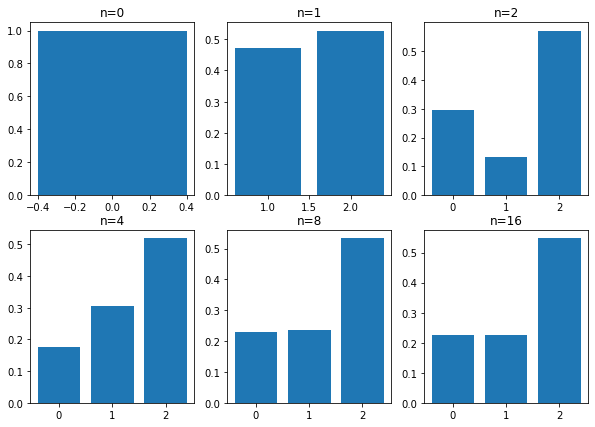

In [ ]:
M6 = M.copy()
instantes = [0,1,2,4,8,16]
def PosiçaoAleatoria(n):
    '''
    Retorna o estado em que o sistema está após t = n*Delta t
    No random.choice coloca-se os estados possíveis e a probabilidade de ir para cada estado dada a posiçao em que está
    '''
    Estados = [0,1,2]
    estado = 0
    for i in range(n):
        estado = np.random.choice(Estados,p = M6[estado,:])
    return estado

def Ensaios(L,n):
    '''
    Retorna o estado do sistema no instante t=nDt para L percursos
    '''
    total = zeros(L)
    for i in range(L):
        total[i] = PosiçaoAleatoria(n)
    return total

figure(figsize = (10,7))

for instante in range(len(instantes)):
    subplot(2,3,instante +1)
    h = unique(Ensaios(1000,instante) , return_counts = True)
    title('n='+str(instantes[instante]))
    bar(h[0], h[1]/sum(h[1]) )

7. As matrizes de Markov podem ter propriedades muito distintas das discutidas nas alíneas anteriores, dependendo dos seus elementos de matriz. Considere, a título de exemplo, as seguintes matrizes de Markov

$$ \mathbb{M}_{1}=\left[\begin{array}{ccc}
0 & 1 & 0\\
0 & 0 & 1\\
1 & 0 & 0
\end{array}\right] $$

$$ \mathbb{M}_{2}=\left[\begin{array}{ccc}
0.98 & 0.02 & 0\\
0 & 0.98 & 0.02\\
0.02 & 0 & 0.98
\end{array}\right] $$

$$ \mathbb{M}_{3}=\left[\begin{array}{ccc}
1 & 0 & 0\\
0 & 0.3 & 0.7\\
0 & 0.6 & 0.4
\end{array}\right] $$


7.1. Represente, no mesmo gráfico, a probabilidade do sistema tomar o estado A no instante $t=n\Delta t$ dado que começou no estado A em $t=0$ para cada uma das matrizes. Use $n$ entre $0$ e $80$.

#Responda Aqui

In [ ]:
M1 = array([[0,1,0],
            [0,0,1],
            [1,0,0]],dtype=float)

M2 = array([[0.98,0.02,0],
            [0,0.98,0.02],
            [0.02,0,0.98]],dtype=float)

M3 = array([[1,0,0],
            [0,0.3,0.7],
            [0,0.6,0.4]],dtype=float)

Ms = [M1,M2,M3]
nt = linspace(0,80,81)
figure(figsize=(16,4))
for Matrix in range(len(Ms)):
    data = zeros([len(nt),3])
    for i in range(len(nt)):
        data[i] = p0s[0]@matrix_power(Ms[Matrix],int(nt[i]))  # começa em A
    subplot(1,3,Matrix+1)
    plot(nt,data[:,0],label='M'+str(Matrix+1),c='b')
    title('Matriz '+str(Matrix+1))
    xlabel('n')
    ylabel('p')

suptitle('Prob. de tomar o estado A, começando em A');

NameError: ignored

7.2. Repita o cálculo mas para probabilidade do estado $C$ dado que o sistema começou em $B$. Como se comparam as velocidades de convergência para equilíbrio para cada uma das matrizes?

Como se observa no gráfico abaixo, a velocidade de convergência para o equilíbrio é maior para a matriz 3, sendo de notar que para a matriz 1 não há convergência para equilíbrio.

In [ ]:
figure(figsize=(16,4))
for Matrix in range(len(Ms)):
    data = zeros([len(nt),3])
    for i in range(len(nt)):
        data[i] = p0s[1] @ matrix_power(Ms[Matrix],int(nt[i]))  # começa em B
    subplot(1,3,Matrix+1)
    plot(nt,data[:,2],c='b')
    title('Matriz '+str(Matrix+1))
    xlabel('n')
    ylabel('p')
suptitle('Prob. de tomar o estado C, começando em B');

7.3. Calcule os valores e vectores próprios (à esquerda) de cada uma e use-os para comentar as propriedades que constatou nas últimas duas alíneas. Caracterize a ergodicidade e estados de equilibrio das dinâmicas de Markov descritas por estas matrizes.

Como se verifica (e tendo em conta que, nesta convenção $p\left(\Delta t\right)=P(0)\cdot\mathbb{M}$, os vetores próprios das matrizes correspondem às linhas retornadas em baixo) a Matriz 2 é a única que tem apenas um valor próprio com módulo igual à unidade sendo, portanto, uma matriz ergódica. Relativamente à matriz 1, não proporciona, claramente, a tendência para um estado de equilíbrio, o que também é visto pelo facto de o conjunto dos seus valores próprios não satisfazer a condição de ergodicidade. Esta matriz não tem nenhum valor prórpio com módulo inferior à unidade pelo que, e tendo em conta a lei de decaimento assimptótico abordada em alíneas anteriores, não existe nenhum valor próprio cuja contribuição se anule, não sendo assim possível ditar a tendência para equilíbrio (o que é evidenciado pelos gráficos anteriores referentes à matriz 1).

In [ ]:
Val1,VecL1,VecR1 = linalg.eig(M1,left=True,right=True)
Val2,VecL2,VecR2 = linalg.eig(M2,left=True,right=True)
Val3,VecL3,VecR3 = linalg.eig(M3,left=True,right=True)

print('Valores Próprios: \n Matriz 1:',abs(Val1),'\n Matriz 2:',abs(Val2),'\n Matriz 3:',abs(Val3))
print('\n Vetores Próprios: \n Matriz 1:\n',real(VecL1),'\n Matriz 2:\n',real(VecL2),'\n Matriz 3:\n',real(VecL3))

# Problema 2 - Passeio aleatório
No problema anterior, estudámos as propriedades de matrizes de Markov com três estados possíveis. Não obstante, podemos generalizar este conceito para um número arbitrário $N$ de estados. Neste contexto, as matrizes de Markov são bastante úteis para descrever passeios aleatórios. Considere uma partícula (Browniana) numa caixa e imersa em fluído, estando constantemente a ser bombardeada por moléculas. Para simplificar, vamos assumir que esta só se pode mover no eixo dos $xx$ e que o espaço está discretizado e limitado nas posições $i$, para $i={0,1,2,...,99}$. <br><br>

Como o movimento da partícula é imprevisível, vamos descrevê-lo numa abordagem estocástica: Se no instante $t$, esta estiver na posição $i$, tem uma probabilidade $p_L$ de se mover para $i-1$, $p_R$ de ir para $i+1$ e $p_s$ de ficar no mesmo sítio, no instante seguinte ($t\!+\!\Delta t$). Nas fronteiras da "caixa" a situação é ligeiramente diferente. Nomeadamente, se estiver em $i=0$, tem probabilidade $p_R$ de ir para a direita e $1-p_R$ de ficar no mesmo sítio. Se estiver em $i=99$, tem probabilidade $p_L$ de ir para a esquerda e $1\!-\!p_{L}$ de permanecer no mesmo sítio. Deste modo, as fronteiras da caixa são paredes impenetráveis.

1. Considerando $p_R\!=\!p_L\!=\!0.3$ e $p_s\!=\!0.4$, calcule a matriz de Markov que descreve este processo. Note que esta matriz tem dimensão $100\!\times\!100$.

#Responda Aqui

In [ ]:
pR,pL,pS = 0.3,0.3,0.4
Omega = zeros([100,100])
for i in range(len(Omega)):
    Omega[i,i]=pS
Omega[0,0] = 1-pR
Omega[len(Omega)-1,len(Omega)-1]=1-pL
for i in range(len(Omega)-1):
    Omega[i+1,i],Omega[i,i+1]=pR,pR
print('A matriz de Markov é dada por: \n',Omega)

A matriz de Markov é dada por: 
 [[0.7 0.3 0.  ... 0.  0.  0. ]
 [0.3 0.4 0.3 ... 0.  0.  0. ]
 [0.  0.3 0.4 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.4 0.3 0. ]
 [0.  0.  0.  ... 0.3 0.4 0.3]
 [0.  0.  0.  ... 0.  0.3 0.7]]


2. Assumindo que a partícula começa em $i=50$, calcule a distribuição de probabilidades da sua posição para $t=n\Delta t $ onde $n\!=\![10,100,500,1000,10000]$. A partir do comportamento observado, como caracterizaria o espalhamento de um conjunto de partículas independentes colocadas no centro da caixa a $t=0$? Meça **a evolução temporal do afastamento quadrático médio desta nuvem de partículas ao centro** da caixa e use essa análise para validar a sua intuíção.

$\mathbf{Nota:}$ neste problema multiplicou-se o vetor $P(0)$ à direita da matriz de Markov devido à maneira como se colocou as probabilidades condicionadas na Matriz na alínea anterior.

Como é possível de observar no primeiro painel, o espalhamento do conjunto de partículas indendentes colocadas no centro da caixa fica uniformemente distribuído à medida que se aumena o $n$ em $t=n\Delta t$. E isto é comprovado pelo que está representado no segundo painel: verifica-se que o afastamento quadrático médio da nuvem de partículas tende, precisamente, para o de uma distribuição uniforme ($\sigma_{un.}^2 = \frac{(b-a)^2}{12}$, em que $a=0$ e $b=100$). De notar que nesta representação usaram-se mais pontos para $n$ no sentido de ilustrar de forma mais clara esta tendência para uma distribuição uniforme.

Para calcular o erro quadrático médio da distribuição usou-se:

$$ \sigma^2 = \langle x^2\rangle-\langle x \rangle ^2 = \sum x^2 P(x)- \left(\sum xP(x) \right)^2 $$

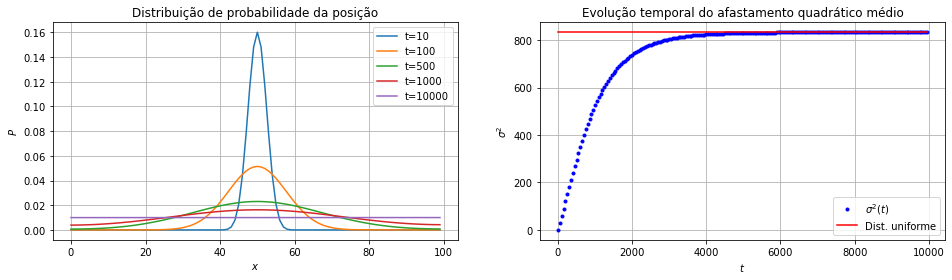

In [ ]:
p0i = zeros(100)
p0i[50]=1
n2 = array([10,100,500,1000,10000])

data2 = zeros([len(n2),100])
x = arange(len(Omega))            # dimensões da caixa

figure(figsize=(16,4))
subplot(121) # Distribuição de Probabilidades da Posição

for n in range(len(n2)):
        data2[n] = matrix_power(Omega,n2[n]) @ p0i
        plot(x,data2[n],label = 't='+str(n2[n]));
title('Distribuição de probabilidade da posição')
legend()
grid()
xlabel('$x$')
ylabel('$P$');

subplot(122) # Evolução temporal do afastamento quadrático médio
def VarUniforme(a,b):
    return (1/12)*(b-a)**2


n3 = arange(0,10000,50)
data3 = zeros([len(n3),100])

for n in range(len(n3)):
        data3[n] = matrix_power(Omega,n3[n]) @ p0i

SqrdError = n3*0.
for i in range(len(n3)):
    SqrdError[i] = sum(x**2 *data3[i]) - sum(x*data3[i])**2

plot(n3,SqrdError,'b.',label='$\sigma^2(t)$')
plot(n3,ones(len(n3))*VarUniforme(0,100),'r',label='Dist. uniforme')
title('Evolução temporal do afastamento quadrático médio')
xlabel('$t$')
ylabel('$\sigma^2$')
legend()
grid()

3. Considere que a partícula está sujeita a um potencial atractivo que torna mais difícil esta abandonar o sítio onde está, quanto mais próxima do centro deste potencial. Neste caso, as probabilidades de transição passam a depender da posição, embora ainda possamos assumir $p_R = p_L$. Concretamente, consideraremos que $p_s\! =\! 1\!-\!p_{R}\!-\!p_{L}\! =\! f(i)$ onde $f(i)$ é uma função da posição. Usando
\begin{equation}
    f(i) = A + B\exp\left(-\frac{(i-i_0)^2}{\sigma^2}\right)
\end{equation}
onde $A\!=\!0.5$, $B=0.4$, $\sigma\!=\!50$ e $i_0 \!=\!70$ calcule a distribuição de probabilidades da sua posição para $t\!=\! n\Delta t $ onde $n\!=\![100,500,1000,10000,100000]$. Represente a evolução da posição média da partícula como função do tempo.

Começemos por determinar as expressões que permitem calcular a probabilidade de a partícula transitar para a direita ou para a esquerda:

$$ p_s(i) = 1-p_R(i) - p_L(i) = A+B\exp\left( -\frac{(i-i_0)^2}{\sigma^2} \right) $$

Fazendo $p_R(i)=p_L(i)$, obtem-se:

$$ p_R(i)=p_L(i)=\frac{1}{2}\left(1-A-B\exp \left( -\frac{(i-i_0)^2}{\sigma^2}\right)\right) $$

Pelo primeiro Painel, conseguimos perceber que o valor médio da posição da partícula vai-se deslocando para a direita estando, assim, a crescer segundo $x$. No segundo painel, está representada evolução temporal do valor médio sendo que se usou um amostra com mais pontos para verificar (como é visível) que o valor médio começa a tender para um valor muito próximo de $x=60$.

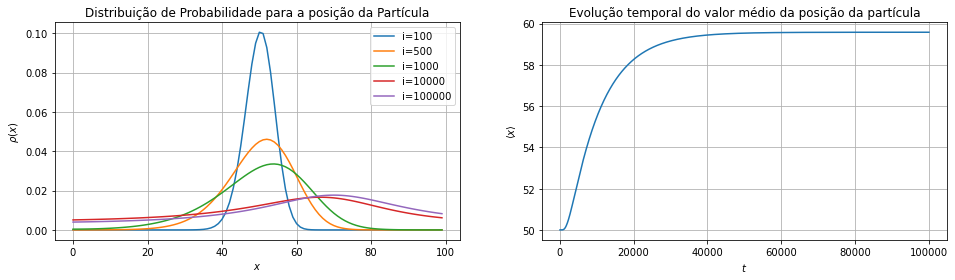

In [ ]:
def f(A,B,i0,sigma,i):
    '''
    Retorna a probabilidade de uma partúlca numa dada posição se manter nessa posição
    A,B,i0,sigma: parâmetros da função
    '''
    return A+B*exp(-(i-i0)**2/sigma**2)

A,B,sigma,i0=0.5,0.4,50,70

NewOmega=np.zeros([100,100],dtype = float)
m=np.arange(len(NewOmega))
NewOmega[m[:],m[:]]=f(A,B,i0,sigma,m[:])                # Diagonal Principal -> Prob. de se manter
NewOmega[m[1:],m[:-1]]=1/2*(1-f(A,B,i0,sigma,m[:-1]))   # Diagonal Secundária Inferior -> Prob. de passar para a direita
NewOmega[m[:-1],m[1:]]=1/2*(1-f(A,B,i0,sigma,m[1:]))    # Diagonal Secundária Superior -> Prob. de passar para a esquerda
NewOmega[m[0],m[0]]=1-1/2*(1-f(A,B,i0,sigma,m[0]))      # 1º Elemento da Diagonal -> Ps = 1- Pr
NewOmega[m[-1],m[-1]]=1-1/2*(1-f(A,B,i0,sigma,m[-1]))   # último elemento da Diagonal -> Ps = 1- Pl

figure(figsize = (16,4))
subplot(121)

n4 = array([100,500,1000,10000,100000])
data4 = zeros([len(n4),100])
for n in range(len(n4)):
        data4[n] = matrix_power(NewOmega,n4[n]) @ p0i
        plot(x,data4[n],label = 'i='+str(n4[n]))
title('Distribuição de Probabilidade para a posição da Partícula')
xlabel('$x$')
ylabel('$\\rho(x)$')
legend()
grid();

subplot(122)

n5 = arange(100,100000,100)
data5 = zeros([len(n5),100])
for n in range(len(n5)):
        data5[n] = matrix_power(NewOmega,n5[n]) @ p0i

media = n5*0.
for i in range(len(media)):
    media[i] = sum(x*data5[i])
plot(n5,media)
title('Evolução temporal do valor médio da posição da partícula')
xlabel('$t$')
ylabel('$\\langle x \\rangle$')
grid();

4. As matrizes de Markov são úteis para descrever passeios aleatórios mas também podem servir para gerar números aleatórios com uma determinada distribuição (a distribuição de equilíbrio). Escolhendo cuidadosamente os elementos de matriz da matriz de Markov, é possível obter uma distribuição de equilíbrio arbitrária. Considere a seguinte matriz de Markov:

$$ \mathbb{M}=\left[\begin{array}{cccccccc}
M_{11} & p_{R} & 0 & \cdots & 0 & p_{c}\\
p_{L} & M_{22} & p_{R} & \cdots & 0 & 0\\
0 & p_{L} & M_{33} & \cdots & 0 & 0\\
\vdots & \vdots & \vdots & \ddots  & \vdots & \vdots\\
0 & 0 & 0 & \cdots & M_{N-1,N-1} & p_{R}\\
p_{L} & 0 & 0 & \cdots & p_{L} &M_{NN}
\end{array}\right]$$

onde $p_R=\frac{1}{2}\exp(-\lambda)$, $p_L=\frac{1}{2}$ e $p_c=\frac{1}{2}\exp(-\lambda(N-1))$.

   4.1. Encontre os $M_{nn}$ e prove analiticamente que a distribuição $\Pi_n\!=\!C \exp(-\lambda n)$ é a distribuição de equilíbrio associada a esta matriz. Encontre $C$.

A distribuição de equilíbrio associada à matriz $\mathbb{M}$ é dada por:

$$ \Pi_n = \sum_m \mathbb{M}_{mn}\Pi_m $$

- Para $n=1$:

$$ \Pi_1 = M_{11}\Pi_{1} + M_{21}\Pi_{2} + M_{N1}\Pi_{N}  \\
   e^{-\lambda} = M_{11}e^{-\lambda} + \frac{1}{2}e^{-2\lambda} + \frac{1}{2}e^{-\lambda N} \\
   M_{11} = 1-\frac{1}{2}\left(e^{-\lambda}+e^{-\lambda(N-1)}\right)$$
   
- Para $1<n<N$:

$$ \Pi_{n}=\Pi_{n-1} M_{n-1 n}+\Pi_{n} M_{n n}+\Pi_{n+1} M_{n+1 n} \\
    e^{-n \lambda}=\frac{e^{-(n-1) \lambda-\lambda}}{2}+e^{-n \lambda} M_{n n}+\frac{e^{-(n+1) \lambda}}{2} \\
    M_{n n}=1-\frac{1}{2}\left(1+e^{-\lambda}\right)$$
    
- Para $n=N$:

$$ \Pi_{N}= M_{1N}\Pi_1 + M_{N-1 N}\Pi_{N-1} + M_{NN}\Pi_{N} \\
    e^{-\lambda N}= \frac{1}{2}e^{-\lambda (N-1)}e^{-\lambda} +\frac{1}{2}e^{-\lambda}e^{-\lambda(N-1)} + M_{NN}e^{-\lambda N} \\ e^{-\lambda N}=\frac{1}{2}e^{-\lambda N} + \frac{1}{2}e^{-\lambda N} + M_{NN}e^{-\lambda N} \\ M_{NN}=0$$
   
Assim, $M_{nn}$ é dado por:

$$ M_{nn}= \begin{cases}1-\frac{1}{2}\left(e^{-\lambda}+e^{-\lambda(N-1)}\right) &,n=1 \\ 1-\frac{1}{2}\left(1+e^{-\lambda}\right)&,1<n<N \\ 0&,n=N \end{cases} $$

Então, pela definição escrita inicialmente, conseguimos provar que a distribuição de equilíbrio é dada pela expressão do enunciado verificando se as linhas da matriz estão normalizadas:

- $n=1$:

$$ 1-\frac{1}{2}\left(e^{-\lambda}+e^{-\lambda(N-1)} \right)+\frac{1}{2}e^{-\lambda}+\frac{1}{2}e^{-\lambda(N-1)}=1 $$


- $1<n<N$:

$$ \frac{1}{2}+1+\frac{1}{2}\left(1+e^{-\lambda} \right)+\frac{1}{2}e^{-\lambda}=1 $$

- $ n=N $:

$$ \frac{1}{2}+\frac{1}{2}+0=1 $$

E agora, para determinar $C$, usamos a normalização da distribuição de equilíbrio, atendendo ao facto que esta pode sre escrita como uma progressão geométrica:

$$ \sum_{n=1}^{N}Ce^{-n\lambda}=1 $$

em que a razão da progressão é $e^{-\lambda}$:

$$  \sum_{n=1}^{N}Ce^{-n\lambda}=1\\
\frac{C\left(1-e^{-\lambda N}\right)}{1-e^{-\lambda}}=1 \\
C=\frac{1-e^{-\lambda}}{1-e^{\lambda N}}
$$

In [ ]:
# Responda Aqui

4.2. Verifique numericamente que isto é verdade. Usando $N=100$, $\lambda=10/N$ e começando com uma distribuição de probabilidade inicial totalmente localizada em $n=N/2$, represente a distribuição de probabilidades $p(n\Delta t)$ para $n=[10,100,1000,10000]$ e compare com a distribuição de equilíbrio.

Como podemos ver no gráfico em baixo, à medida que aumentamos o $n$ a nossa distribuição de probabilidades tende para a distribuição de equilíbrio obtida na alínea anterior.

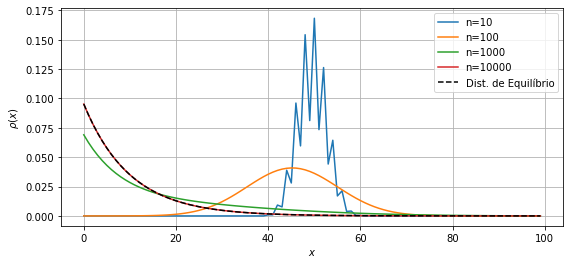

In [ ]:
N = 100             #
indexes = arange(N) # parâmetros do problema
lbd = 10/N          #

Pinicial = zeros(100) # probabilidade incial
Pinicial[int(N/2)]=1  #

MarkoVMatrix = zeros([100,100],dtype = float)
MarkoVMatrix[0,0] = 1 - .5*(exp(-lbd)+exp(-lbd*(N-1)))               # Elemento 1,1 da matriz de Markov
MarkoVMatrix[indexes[1:-1],indexes[1:-1]] = 1 - .5*(1 + exp(-lbd))   # Diagonal Principal
MarkoVMatrix[indexes[1:],indexes[:-1]] = 1/2                         # Diagonal Secundária Inferior
MarkoVMatrix[indexes[:-1],indexes[1:]] = .5*exp(-lbd)                # Diagonal Secundária Superior
MarkoVMatrix[0,-1] = .5*exp(-lbd*(N-1))                              # Condição Fronteira
MarkoVMatrix[-1,0] = .5                                              # Condição Fronteira
# print(MarkoVMatrix)

def Pi(C,lbd,n):
    '''
    Retorna a distribuição de equilíbrio
    C e lbd: parâmetros da distribuição
    '''
    return C*exp(-lbd*n)

C = (1-exp(-lbd))/(1-exp(-N*lbd))

n7 = array([10,100,1000,10000])
data7 = zeros([len(n7),100])

figure(figsize=(9,4))
for n in range(len(n7)):
        data7[n] = Pinicial @ matrix_power(MarkoVMatrix,n7[n])
        plot(x,data7[n],label = 'n='+str(n7[n]))
plot(x,Pi(C,lbd,x),'k--',label='Dist. de Equilíbrio')
xlabel('$x$')
ylabel('$\\rho(x)$')
grid()
legend();

# Problema 3 - Balanço detalhado e algoritmo de Metropolis
No problema anterior, verificou-se que uma escolha específica de elementos de matriz, permitiu desenhar uma dinâmica de Markov com uma distribuição de equilíbrio exponencial. Isto pode ser expandido para qualquer distribuição, bastando saber que elementos escolher para a matriz de Markov. Aqui vamos explorar uma maneira de o fazer. A condição de balanço detalhado
$$\Pi_n M_{nm}=\Pi_m M_{mn} $$
garante que, se $\mathbb{M}$ for ergódica, $\mathbb{M}$ dará origem à distribuição de equilíbrio $\mathbf{\Pi}$. Esta condição adicional à dinâmica de Markov é um ingrediente fulcral para construir o algoritmo de Metropolis.<br><br>

Um passo de Metropolis pode ser visto como um passo de uma dinâmica Markoviana (de matriz $\mathbb{M}$) especificamente desenhada. Os elementos de $\mathbb{M}$ são então divididos no passo de proposta e no passo de aceitação/Recusa. No primeiro passo, se o sistema estiver na posição $m$, a sua próxima posição, $n$, será determinada por uma distribuição $P_{nm}$. A nova posição pode (ou não) ser aceite, com uma determinada probabilidade $A_{nm}$ dada por

$$ A_{nm}=\min\left(1,\frac{\Pi_m P_{mn}}{\Pi_n P_{nm}}\right) $$
e os elementos de matriz de $\mathbb{M}$ são $M_{nm}=P_{nm}A_{nm}$. Existe imensa flexibilidade para a escolha de $P_{nm}$, uma vez que a distribuição de equilíbrio $\Pi$ é garantida por $A_{nm}$.<br><br>
1.Mostre que a matriz de Markov $\mathbb{M}$ assim definida satisfaz a condição de balanço detalhado para qualquer distribuição de equilíbrio $\mathbf{\Pi}$.

Tal como é referido no enunciado, os elementos da matriz $\mathbb{M}$ são dados por $M_{nm}=P_{nm}A_{nm}$, o que também pode ser escrito como:

$$ M_{nm} = P_{nm}\min\left(1,\frac{\Pi_m P_{mn}}{\Pi_n P_{nm}}\right) $$

Usando a condição de balanço detalhado ficamos com a equação seguinte:

$$ \Pi_{n} P_{n m} \min \left(1, \frac{\Pi_{m} P_{m n}}{\Pi_{n} P_{n m}}\right)=\Pi_{m} P_{m n} \min \left(1, \frac{\Pi_{n} P_{n m}}{\Pi_{m} P_{m n}}\right) $$

Posto isto, podemos afirmar que: se do lado esquerdo da equção tivermos 1 como mínimo do lado direito será a fração, ou seja:

- $1< \frac{\Pi_{m} P_{m n}}{\Pi_{n} P_{n m}}$:

$$ \Pi_{n} P_{n m}=\Pi_n  P_{m n} \frac{\Pi_{n} P_{n m}}{\Pi_{m} P_{m n}} \\ \Pi_{n} P_{nm}=\Pi_{n} P_{n m} $$

- $1> \frac{\Pi_{m} P_{m n}}{\Pi_{n} P_{n m}}$:

$$ \Pi_n  P_{n m} \frac{\Pi_{m} P_{ mn}}{\Pi_{n} P_{n m}}=\Pi_{m} P_{mn} \\ \Pi_{m} P_{mn}=\Pi_{m} P_{ mn} $$

Posto, verifica-se que para qualquer um dos dois casos, a matriz de Markov $\mathbb{M}$ satisfaz a condição de balanço detalhado para qualquer distribuição de equilíbrio.

In [ ]:
# Responda Aqui

2. Usando $\Pi_n=C \exp\left(-n\lambda\right)$ e $P_{nm}=\frac{1}{2}\delta_{n,m+1}+\frac{1}{2}\delta_{n,m-1}$ mostre que a matriz $\mathbb{M}$ obtida é idêntica à do problema anterior. Considere que $P_{0,N-1} = 1/2$  e  $P_{N-1,0} = 1/2$

A matriz $P_{nm}$ terá diagonais secundárias com valores de $\frac{1}{2}$

Como se pode verificar, a mtriz retornada em baixo é idêntica à matriz obtida na alínea anterior.

In [ ]:
def Pi3(C,lbd,n):
    '''
    Distribuição de equilíbrio
    C,lbd: Parâmetro da Distribuição
    '''
    return C*exp(-lbd*n)

C = (1-exp(-lbd))/(1-exp(-N*lbd))

def P(n,m):
    '''
    Função que calcula as entradas da matriz P_{nm}
    Em concreto, calcula as diagonais secundárias dadas pelos deltas referidos no enunciado
    '''
    if (n==m+1)or(n==m-1):
        return 1/2
    else:
        return 0

def M(N):
    '''
    Calcula a Matriz de Markov com tamanho N usando o algoritmo de Metropolis
    A Matriz Prob é a matriz de probabilidades P_{nm}
    '''
    M = zeros([N,N],dtype = float)
    Prob = M * 0.
    for n in range(len(Prob)):
        for m in range(len(Prob[0])):
            Prob[n,m] = P(n,m)
    Prob[0,N-1],Prob[N-1,0] = .5, .5
#     return Prob
    for n in range(len(M)):
        for m in range(len(M[0])):
            M[n,m] = Prob[n,m] * min(1,Pi3(C,lbd,m)/Pi3(C,lbd,n))

    for i in range(len(M)):
        M[i,i] = 1-sum(M[i,:])
    return M

difs = zeros(len(M(100)))      # verificar a diferença com as entradas da matriz do exercício anterior
for i in range(len(M(100))):
               difs[i] = sum((M(100)-MarkoVMatrix)[i])
max(difs)              # retorna o valor máximo das diferenças que, como se vê, numericamente nulo

5.551115123125783e-17

3. Usando este método, encontre uma outra matriz $\mathbb{M}^{\prime}$ que dê origem à mesma distribuição de equilíbrio exponencial e demonstre isto numericamente.

Sabemos que as entradas de uma matriz genérica $\mathbb{M}$ são dadas por $M_{nm}$ e podem ser obtidas a partir da relação: $M_{nm} = P_{nm}A_{nm}$.Então, para obtermos uma outra matriz $\mathbb{M}'$ ficamos com:

$$ M_{nm}'=P_{nm}'A_{nm} $$

Logo, temos que modificar a nossa matriz de maneira a que a distribuição de equilíbrio continue a ser uma exponencial. Para tal, 'subdividiu-se' as diagonais secundárias, ou seja, como anteriormente tínhamos probabilidades de 0.5 nas diagonais secundárias, agora colocaram-se valores de probabilidade nas diagonais acima e abaixo dessas mesmas de maneira que a soma entre elas continuasse a dar 0.5. O que foi aqui explicado pode ser escrito da seguinte forma:

$$ P_{nm} = \frac{4}{10}(\delta_{n,m+1}+\delta_{n,m-1}) + \frac{1}{10}(\delta_{n,m+2}+\delta_{n,m-2})  $$

E, como se pode verificar no painel em baixo, a distribuição de equilíbrio encontrada segue, de facto, um comportamento exponencial, tal como acontecia para a matriz $\mathbb{M}$ do problema anterior.

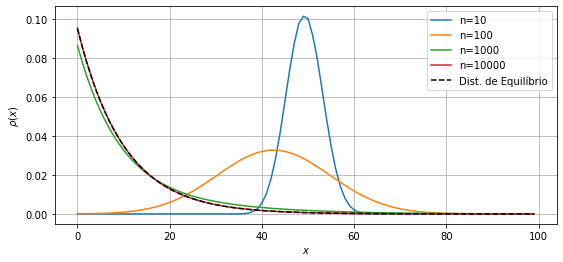

In [ ]:
def P2(n,m):
    '''
    Função que calcula as entradas da matriz P_{nm}
    '''
    if (n==m+1)or(n==m-1):
        return .4
    else:
        if (n==m-2)or(n==m+2):
            return .1
        else:
            return 0

def M2(N):
    '''
    Calcula a Matriz de Markov com tamanho N usando o algoritmo de Metropolis
    '''
    M = zeros([N,N],dtype = float)
    Prob = M * 0.
    for n in range(len(Prob)):
        for m in range(len(Prob[0])):
            Prob[n,m] = P2(n,m)
    Prob[0,N-1],Prob[N-1,0] = .5, .5
#     return Prob
    for n in range(len(M)):
        for m in range(len(M[0])):
            M[n,m] = Prob[n,m] * min(1,Pi3(C,lbd,m)/Pi3(C,lbd,n))

    for i in range(len(M)):    # normalização
        M[i,i] = 1-sum(M[i,:])
    return M

# M2(100)

n7 = array([10,100,1000,10000])
pontos = zeros([len(n7),100])

figure(figsize=(9,4))
for n in range(len(n7)):
        pontos[n] = Pinicial @ matrix_power(M2(100),n7[n])
        plot(x,pontos[n],label = 'n='+str(n7[n]))
plot(x,Pi(C,lbd,x),'k--',label='Dist. de Equilíbrio')
xlabel('$x$')
ylabel('$\\rho(x)$')
grid()
legend();

4. 4. Isto justifica a utilização do algoritmo de Metropolis, em que a matriz de Markov é implicitamente implementada através de um passeio aleatório mas nunca precisa de ser calculada explicitamente. Para tal, considere uma partícula na posição $n=n_{0}$ a $t=0$. No instante seguinte, é feita uma proposta para que se mova para a esquerda ou para a direita, sendo qualquer resultado igualmente provável. Seja $m$ a posição proposta, que é aceite com uma probabilidade $A_{nm}$. Repetindo este processo várias vezes, faça o histograma das posições da partícula nos instantes $t=\left[0,10,20\right]\Delta t$ para $N=1000$ realizações deste independentes deste passeio aleatório. Compare com as conclusões do problema anterior.

De entre 100 posições possíveis, podemos considerar que a transição de uma partícula para uma posição à sua esquerda ou à sua direita corresponde a a somar ou subtrair 1. Então, a cada passo, iremos fazer com que seja escolhida aleatoriamente um número de entre d = [-1,1] (Em que esta posição $m$ é proposta com uma probabilidade $A_{nm}$). Então, a posição da partícula após esta transição é dada por $m=n_{0}+d[i]$. No entanto, temos que ter em conta o facto de, quando a partícula se encontra em $x=0$ não existem mais posições à esquerda e quando está em $x=99$ não existem mais posições à direita. Ou seja, no final de realizar os várias transições, vamos procurar $m$s que sejam -1 ou 100 e passá-los para 99 e 0, respetivamente (esta parte está assinalada no código com #**).

Comparando estas distribuições com as do problema anterior, verifica-se que os resultados obtidos são os mesmos os obtidos na alínea anterior, verificando-se novamente entre Processos de Markov e Passeios Aleatórios para gerar amostras que seguem uma dada distribuição de probabilidade.


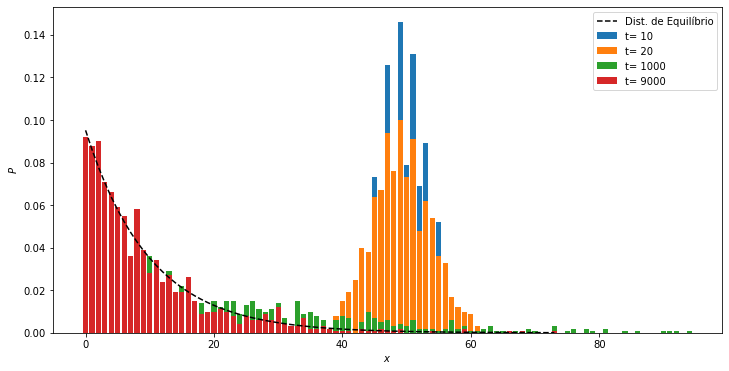

In [ ]:
def PasseioAleatorio(n0,t):
    '''
    Esta função irá retornar a posição da partícula num dado instante
    n0: posição inicial da partícula (em t=0)
    t : instante no qual queremos determinar a posição da partícula
    m: posição proposta, que é aceite com probabilidade A_{mn}
    '''
    trans = [-1,1]                        # vetor com as possíveis transições
    N = len(n0)
    m = zeros([t+1,N])
    step = copy(n0)
    P = Pi(C,lbd,arange(100))             # Distribuição de Equilíbrio para as posições x=[0,99]
    m[0] = n0                             # Posições iniciais

    for time in range(t):
        FinalPositions = copy(step + np.random.choice(trans,size = N))

        inicio,fim = where(FinalPositions == -1),where(FinalPositions == 100) # **
        FinalPositions[inicio]=99                                             # **
        FinalPositions[fim] = 0                                               # **

        u = random(N)                                            # probabilidade aleatória (N números entre 0 e 1)
        fica = where(u < (P[FinalPositions]/P[step]))            # escolha/recusa

        step[fica] = FinalPositions[fica]                        # onde fica parado
        m[time] = step
    return m

Times = [10,20,1000,9000]
posic_in =zeros(1000,int)+50
RD = PasseioAleatorio(posic_in,10000)

figure(figsize=(12,6))
for t in range(len(Times)):
    x,y = unique(RD[Times[t]],return_counts=True)
    bar(x,y/sum(y),label='t= '+str(Times[t]))
plot(x,Pi(C,lbd,x),'k--',label='Dist. de Equilíbrio')
xlabel('$x$')
ylabel('$P$')
legend();
print('Comparando estas distribuições com as do problema anterior, verifica-se que os resultados obtidos são os mesmos'
      ' os obtidos na alínea anterior, verificando-se novamente entre Processos de Markov e Passeios Aleatórios para'
      ' gerar amostras que seguem uma dada distribuição de probabilidade.')

5. Para uma realização do passeio aleatório com $T=10^6$ iterações de Metropolis, usando os parâmetros da alínea anterior, faça o histograma das posições $i(t)$ que a partícula ocupou ao longo do tempo

#Responda Aqui

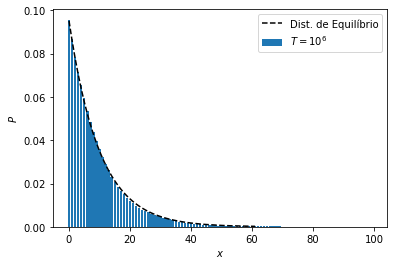

In [ ]:
i_t = PasseioAleatorio(array([50],int),10**6) # Posições iniciais
pos,p = unique(i_t,return_counts = True)      # Cálculo das Probabilidades
bar(pos,p/sum(p),label='$T = 10^6$')
plot(x,Pi(C,lbd,x),'k--',label='Dist. de Equilíbrio')
xlabel('$x$')
ylabel('$P$')
legend();

6. Para uma realização do passeio aleatório, calcule a correlação entre duas posições da partícula separadas temporalmente por $\tau$.
$$ C\left(\tau\right)=\sum_{t=0}^{\infty}\frac{i\left(t+\tau\right)i\left(t\right)-\mu^{2}}{\sigma^{2}} $$ onde $\mu$ é a média da distribuição de equilíbrio e $\sigma$ é o desvio-padrão.

Faça uma estimativa para o tempo que é necessário ter passado para que duas posições estejam descorrelacionadas temporalmente.

A expressão do enunciado também pode ser escrita da seguinte forma:

$$C(\tau)=\frac{\left[\frac{1}{T-\tau_{\max }} \sum_{t=0}^{T-\tau_{\max }-1} n(t+\tau) n(t)\right]-\mu^{2}}{\sigma^{2}}$$

Para a resolução deste problema considera-se $\tau$ ente 0 e $\tau_{max}=5000$

No gráfico em baixo, verifica-se que o tempo necessário para que duas posições deixem de estar correlacionadas temporalmente é de aproximadamente $\tau = 2000$

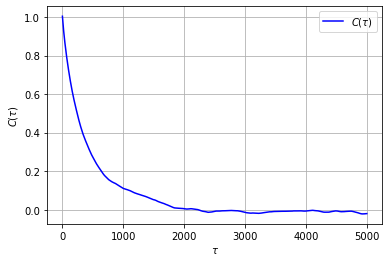

In [ ]:
# começemos por calcular a média e a variância da distribuição
medium,variancia = mean(i_t),var(i_t)
tau = linspace(1,5000,500,dtype = int)

C_tau = tau*0.

for i in range(len(tau)):
    Somatorio = (1/(10**6 -5000))*sum(i_t[tau[i]:] * i_t[:-tau[i]]) # calcula (1/(T-Tmax)) * sum(n(t+tau)*n(t))
    C_tau[i] = (Somatorio - medium**2)/variancia
plot(tau,C_tau,'b',label='$C(\\tau)$')
xlabel('$\\tau$')
ylabel('$C(\\tau)$')
grid()
legend();
# print(medium,variancia,taus)

7. Na alínea 5, verificou que se fizer o histograma das posições da partícula ao longo do tempo para **uma** realização do passeio aleatório, obtém novamente a distribuição de equilíbrio pretendida. Porquê? Justifique isto à luz da alínea 6.

De facto, da alínea 5 verificou-se que para $T = 10^6$ o histograma das posições da partícula ao longo do tempo para uma realização do passeio aleatório, se obtém novamente a distribuição de equilíbrio pretendida. Pelo gráfico apresentado na alínea 6, verifica-se que para um valor de $\tau=2000$ duas posições das partículas deixam de estar correlacionadas temporalmente. Como tal, seria de esperar que se estudassemos a distribuição de probabilidades para a posição das partículas para n>2000 ($p(n\Delta t)$) iríamos obter novamente a distribuição de equilíbrio. Estar em equilíbrio significa, precisamente, que a partir de um certo tempo, as posições do sistema não se alteram, não estão correlacionadas.

In [ ]:
# Responda Aqui